# Tugas Tambahan Programming MatTek

Nama: Evandita Wiratama Putra

Npm: 2206059572

## Soal 1: Discrete Fourier Transform

Diberikan suatu vektor sinyal periodik berupa 8 sampling data, yaitu [0,2,4,8,16,32,64,128].

1. Susun matrik transformasi DFTnya, dapatkan vektor berupa 8 data spektral nya.

2. Berikan komentar Anda jika dibandingkan dengan bentuk spektral sinyal periodik analog yang serupa.

3. Susun matriks invers DFTnya, untuk mendapatkan kembali vektor yang berupa 8 data sampling sinyal awal

## Jawab:


### 1. Menyusun Matriks DFT

#### 1.1 Import Library Python yang dibutuhkan


In [37]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


Untuk menggunakan Bahasa Python, lakukan import terlebih dahulu Library yang akan digunakan. Library yang digunakan antara lain sebagai berikut:

1. `numpy`. Library ini digunakan untuk melakukan perhitungan numerik kompleks yang tidak dapat dilakukan pada bahasa Python biasa.

2. `scipy`. Library ini digunakan secara spesifik untuk melakukan integral nantinya.

3. `matplotlib.pyplot`. Library ini digunakan untuk melakukan plotting graph dari data yang dapatkan. Hal ini sangat berguna untuk mendapatkan hasil visualisasi dari data yang telah diolah sedemikian rupa.

#### 1.2 Menyusun Fungsi Diskrit dan Kontinu


Data Sample:

$$
[0, 2, 4, 8, 16, 32, 64, 128]
$$

Continuous Function:

$$
f(x) = 2^x
$$

In [38]:
# Data Sampling Diskrit
x_discrete = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y_discrete = np.array([0,2,4,8,16,32,64,128])

# Sinyal Kontinu
x_continuous = np.linspace(0, 7, 1000)
y_continuous = 2**x_continuous


Pertama-tama data dari soal perlu diterjemahkan dalam bahasa pemrograman Python terlebih dahulu agar dapat diolah. Untuk data yang bersifat diskrit (sampel), akan menggunakan `array` biasa, sedangkan untuk data yang bersifat kontinu (sinyal analog), akan menggunakan fungsi `f(x) = 2^x`.

#### 1.3 Membuat Graf dari Fungsi Diskrit dan Kontinu

Kode di bawah memanfaatkan library `matplotlib.pyplot` untuk melakukan plotting graf dari data diskrit serta kontinu yang telah diinisialisasi

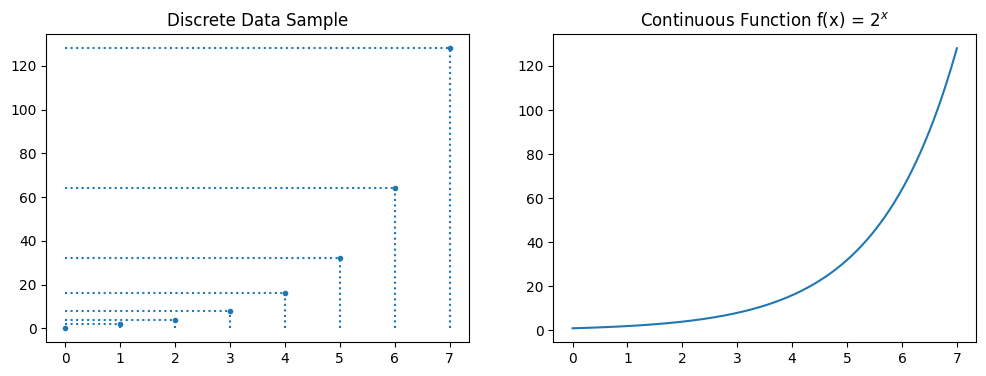

In [39]:
# Graph Plotting

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_discrete, y_discrete, ".")
plt.title("Discrete Data Sample")
for i in range(len(x_discrete)):
    plt.vlines(x_discrete[i], ymin=0, ymax=y_discrete[i], linestyles='dotted')
    plt.hlines(y_discrete[i], xmin=0, xmax=x_discrete[i], linestyles='dotted')

plt.subplot(1, 2, 2)
plt.plot(x_continuous, y_continuous)
plt.title(r"Continuous Function f(x) = $2^x$")
plt.show()


Hasil Grafik di atas merupakan bentuk representasi visual untuk data diskrit dan kontinu yang akan digunakan. Didapatkan bahwa data sampel direpresentasikan menggunakan titik-titik karena bersifat diskrit, sedangkan untuk sinyal analog direpresentasikan menggunakan kurva karena bersifat kontinu. Meskipun begitu, data-data baik yang bersifat diskrit maupun analog sebenarnya adalah data yang sama.

#### 1.4 Melakukan Discrete Fourier Transform untuk Data Sample

Untuk melakukan proses DFT dalam bahasa Python, rumus DFT harus diturunkan terlebih dahulu agar dapat digunakan.

$$
c_{n} = \frac{1}{N} \sum_{k=0}^{N-1} f_{k} e^{-jnx_{k}}
$$

$$
\hat{f_{n}} = Nc_{n} = \sum_{k=0}^{N-1} f_{k} e^{-jnx_{k}}
$$

$$
\hat{f_{n}} = \sum_{k=0}^{N-1} f_{k} e^{-2j \pi nk / N}
$$

Bentuk di atas sudah cukup sederhana, sehingga dapat dengan mudah rumus tersebut diimplementasikan dalam bentuk kode.

In [40]:
# Discrete Fourier Transform
N = len(x_discrete)
dft = np.zeros(N, complex)
k = np.arange(N)
for n in range(N):
    dft[n] = np.sum(y_discrete*np.exp(-2j*np.pi*n*k/N))

print(f"Discrete Spectral Vector from DFT = \n{dft}")

Discrete Spectral Vector from DFT = 
[254.        +0.00000000e+00j  47.63961031+1.66066017e+02j
 -52.        +1.02000000e+02j -79.63961031+4.60660172e+01j
 -86.        -7.66628896e-14j -79.63961031-4.60660172e+01j
 -52.        -1.02000000e+02j  47.63961031-1.66066017e+02j]


#### 1.5 Melakukan Plotting Graph dari hasil matriks DFT 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


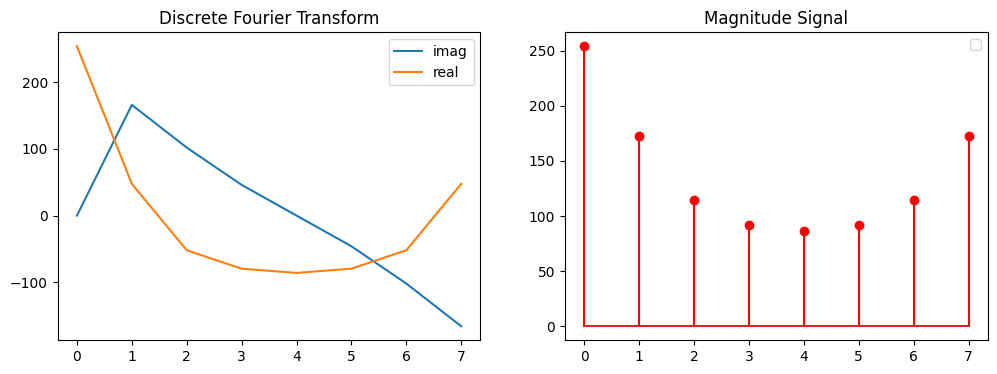

In [41]:
# Graph Plotting for DFT
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(np.imag(dft), label="imag")
plt.plot(np.real(dft), label="real")
plt.title("Discrete Fourier Transform")
plt.legend()

plt.subplot(1, 2, 2)
plt.stem(abs(dft), "r.")
plt.title("Magnitude Signal")
plt.legend()

plt.show()

Agar dapat melihat representasi visual dari Vektor Transformasi yang didapatkan, maka plotting Graf untuk hasil DFT dari data sampel tersebut dapat dilakukan. Karena rumus melibatkan bilangan kompleks, maka dibutuhkan 2 graf untuk memetakan hasil tersebut. 2 Graf yang digunakan antara lain sebagai berikut:

1. `Discrete Fourier Transform` Graph berisikan hasil asli dari proses transformasi DFT pada data sampel yang diberikan soal. Hasil ini masih dalam bentuk kompleks, sehingga sumbu-x digunakan untuk merepresentasikan nilai `real` dan sumbu-y digunakan untuk merepresentasikan nilai `imajiner`.

2. `Magnitude Signal` Graph berisikan nilai absolut baik dari bilangan `real` maupun `imajiner` hasil transformasi DFT. Graph ini digunakan untuk mendapatkan visual secara keseluruhan dari hasil DFT tanpa melibatkan bilangan kompleks.

### 2. Membandingkan Hasil DFT dengan Spektral Sinyal Analog

#### 2.1 Melakukan Complex Fourier Transform untuk Sinyal Analog

$$
F(w) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) e^{-jwx} dx
$$

Complex Fourier Transform dapat diterapkan pada Sinyal Analog yang bersifat kontinu untuk mendapatkan amplitudo spektral sinyal periodik tersebut. Untuk melakukan transformasi tersebut dalam bahasa Python, terdapat 2 cara yang tersedia:

1. Cara pertama, yakni dengan melakukan perhitungan analitik terlebih dahulu pada fungsi `F(w)` dari Fourier Complex Transform untuk mendapatkan bentuk persamaan tanpa adanya integral. Lalu melakukan perhitungan fungsi tersebut dalam program Python dengan bantuan Library `numpy`.

2. Cara kedua, yakni dengan melakukan perhitungan numerik secara langsung pada fungsi `F(w)` dari Fourier Complex Transform yang masih memiliki integral. Bentuk integral cukup sulit untuk diselesaikan secara langsung melalui coding, sehingga dalam Python dapat menggunakan bantuan dari Library tambahan, yakni `scipy` yang menyediakan komputasi integral secara langsung pada program. Hanya saja, hasil komputasi ini mampu menyebabkan kesalahan hasil apabila bentuk persamaan kompleks. Namun, hal ini tidaklah masalah karena fungsi yang ingin diintegralkan pada persoalan ini masih bisa dianggap sederhana.

Kedua cara ini akan diimplementasikan pada Python untuk memastikan bahwa hasil Complex Fourier Transform yang dilakukan **benar**. Hasil plotting grafik dari metode Analitik dan hasil plotting grafik dari metode Numerik nantinya akan digunakan untuk memvalidasi kebenaran dari hasil sinyal spektral tersebut. Apabila hasil sinyal spektral tersebut telah **terbukti benar**, maka perbandingan Discrete Fourier Transform dengan Complex Fourier Transform dapat dilakukan.

#### 2.2 Complex Fourier Transform Metode Analitik

Pada metode analitik, fungsi Complex Fourier Transform `F(w)` diselesaikan terlebih dahulu bentuk integralnya agar tidak membebankan proses komputasi program. Berikut merupakan tahapan penyderhanaan fungsi `F(w)`

$$
F(w) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) e^{-jwx} dx
$$

$$
F(w) = \frac{1}{\sqrt{2\pi}} \int_{0}^{7} 2^x e^{-jwx} dx
$$

$$
F(w) = \frac{1}{\sqrt{2\pi}} \int_{0}^{7} (2e^{-jw})^x dx
$$

$$
F(w) = \frac{1}{\sqrt{2\pi}} (\frac{(2e^{-jw})^x}{ln(2e^{-jw})})|^{7}_{0}
$$

$$
F(w) = \frac{1}{\sqrt{2\pi}} (\frac{(2e^{-jw})^7 - 1}{ln(2e^{-jw})})
$$

$$
F(w) = \frac{1}{\sqrt{2\pi}} (\frac{(2e^{-jw})^7 - 1}{ln(2) - jw})
$$

Setelah bentuk sederhana didapatkan, persamaan fungsi ini dapat langsung diselesaikan dalam bahasa Python dengan code sebagai berikut:

In [42]:
# Complex Fourier Transform

w = x_continuous
Fw = 1 / ((2 * np.pi)**(1/2)) * ((2*np.exp(-1j*w))**7 - 1) / (np.log(2) - 1j * w)


#### 2.3 Complex Fourier Transform Metode Numerik

Pada metode numerik, fungsi Complex Fourier Transform `F(w)` yang masih memiliki bentuk integral langsung dikomputasi oleh program Python. Berikut merupakan kode yang digunakan untuk mengimplementasikan hal tersebut

In [43]:
@np.vectorize
def F(w):
    def integrand(x): return 1/((2*np.pi)**(1/2)) * 2**x * np.exp(-1j *w * x)
    Ireal, _ = sp.integrate.quad(lambda x: np.real(integrand(x)), 0, 7)
    Iimag, _ = sp.integrate.quad(lambda x: np.imag(integrand(x)), 0, 7)
    return Ireal + 1j * Iimag

#### 2.4 Validasi hasil Complex Fourier Transform untuk Metode Analitik dan Metode Numerik

Untuk memvalidasi kebenaran dari hasil fungsi spektral dari sinyal analog yang diberikan, maka grafik hasil perhitungan metode analitik dan grafik hasil perhitungan metode analitik dapat dibandingkan satu sama lain. Apabila didaptkan grafik tersebut **berbeda**, maka hasil transformasi sinyal analog masih **salah** dan perlu dianalisis kembali letak kesalahannya, namun apabila didapatkan bahwa grafik tersebut **serupa**, maka hasil transformasi sinyal analog sudah **benar**, sehingga siap untuk dibandingkan dengan grafik DFT.

Berikut merupakan kode untuk menampilkan kedua grafik tersebut:

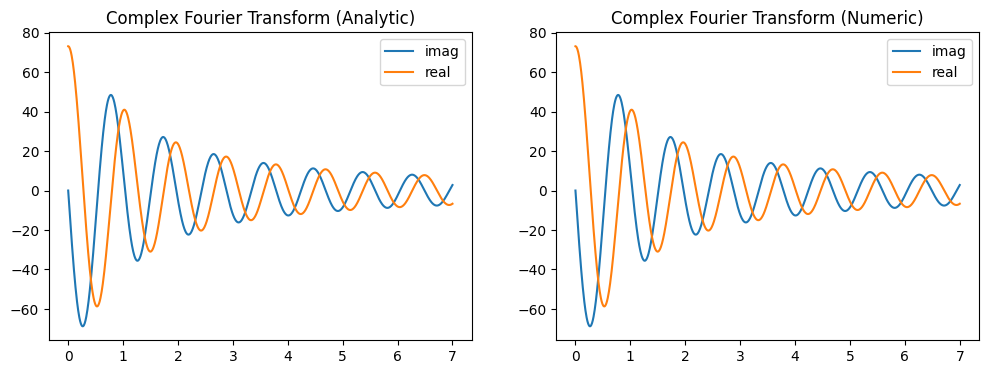

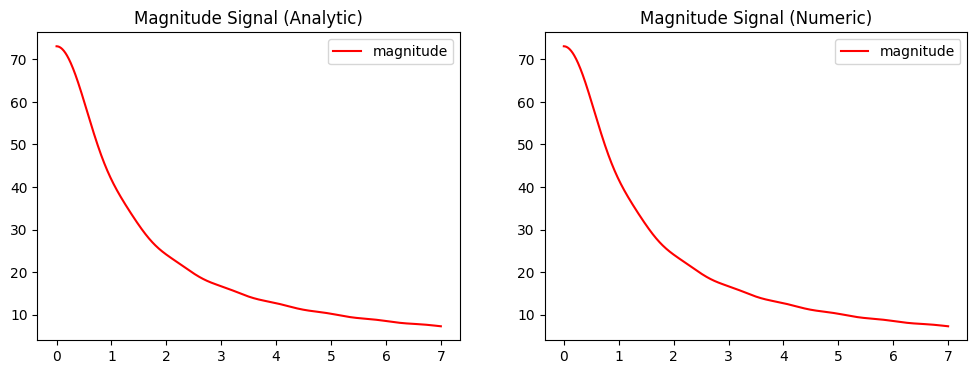

In [44]:
# Graph Plotting Complex Fourier Transform using Analytic Method
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(w, np.imag(Fw), label="imag")
plt.plot(w, np.real(Fw), label="real")
plt.title("Complex Fourier Transform (Analytic)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(w, np.imag(F(w)), label="imag")
plt.plot(w, np.real(F(w)), label="real")
plt.title("Complex Fourier Transform (Numeric)")
plt.legend()

plt.show()


# Graph Plotting Complex Fourier Transform using Numeric Method
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(w, abs(Fw), "r", label="magnitude")
plt.title("Magnitude Signal (Analytic)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(w, abs(F(w)), "r", label="magnitude")
plt.title("Magnitude Signal (Numeric)")
plt.legend()

plt.show()


Didaptkan bahwa dari metode analitik maupun metode numerik, grafik tersebut serupa, sehingga Fungsi Spektral yang didaptkan dari sinyal analog **benar**.

#### 2.5 Perbandingan Hasil Discrete Fourier Transform dengan Bentuk Spektral Sinyal Periodik Analog

Setelah didapatkan hasil Discrete Fourier Transform dari data sampel dan hasil Complex Fourier Transform dari sinyal analog, maka perbandingan dari grafik hasil tersebut dapat dilakukan. Untuk mengimplementasikan perbandingan grafik pada Python, dapat dilakukan menggunakan kode berikut:

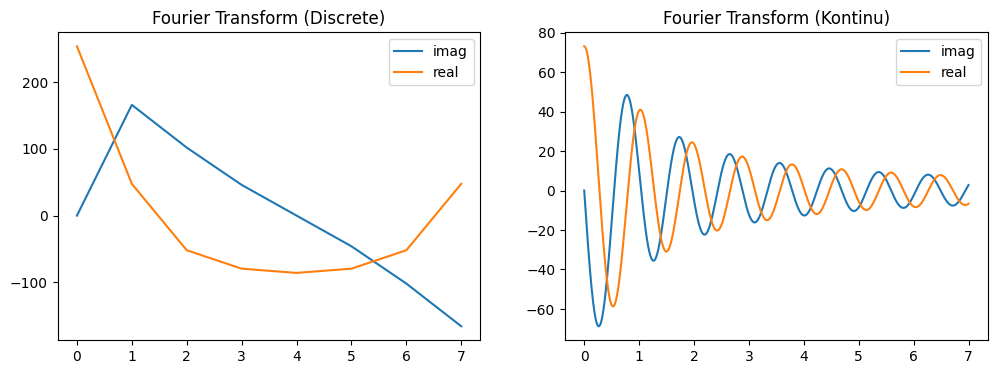

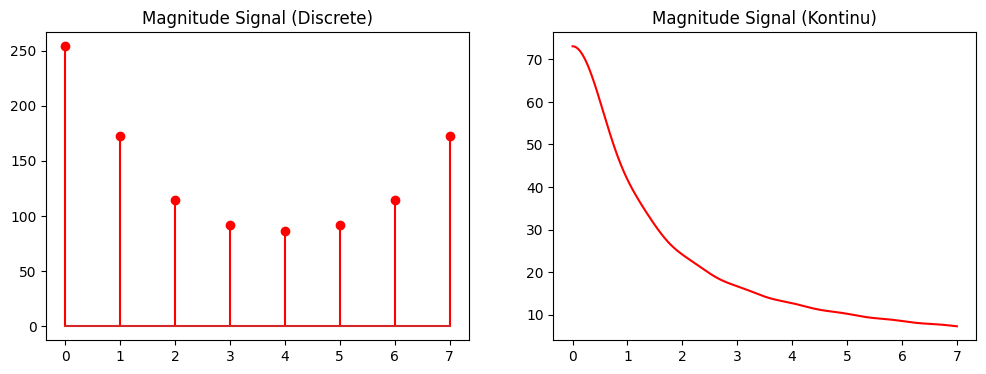

In [45]:

# Fourier Transform Graph (Discrete vs Continous)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(np.imag(dft), label="imag")
plt.plot(np.real(dft), label="real")
plt.title("Fourier Transform (Discrete)")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(w, np.imag(F(w)), label="imag")
plt.plot(w, np.real(F(w)), label="real")
plt.title("Fourier Transform (Kontinu)")
plt.legend()

plt.show()

# Graph Plotting Complex Fourier Transform using Numeric Method
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.stem(abs(dft), "r.")
plt.title("Magnitude Signal (Discrete)")

plt.subplot(1, 2, 2)
plt.plot(w, abs(F(w)), "r")
plt.title("Magnitude Signal (Kontinu)")

plt.show()

Jika dibandingkan antara hasil Discrete Fourier Transform dari sampel data dengan bentuk spektral sinyal periodik analog tersebut, maka akan didapatkan **hasil yang berbeda**, namun **bentuk yang sedikit serupa**. Hasil amplitudo untuk sinyal diskrit berkisar di nilai 250, sedangkan hasil amplitudo untuk sinyal analog berkisar di nilai 70. Untuk bentuknya, pada saat n=0 sampai 4, bentuk spektral sinyal diskrit maupun analog masih serupa, namun untuk seterusnya berbeda, dimana **sinyal diskrit monoton naik**, sedangkan **sinyal analog monoton turun**. Hal ini berkemungkinan disebabkan oleh `Nyquist Limit`, dimana hasil sampling data hanya digunakan saat `frequency/2`. Selebihnya, perbedaan utama tentu dapat dilahit dari segi representatif grafik tersebut, dimana spektral sinyal diskrit direpresentasikan oleh titik-titik, sedangkan spektral sinyal analog direpresentasikan oleh kurva yang mulus.

### 3. DFT Inverse

#### 3.1 Mencari Invers dari Hasil Discrete Fourier Transform

DFT Inverse merupakan fungsi yang dapat digunakan untuk mentransformasikan hasil DFT balik menjadi data sampel awal. DFT Inverse dapat dimanfaatkan untuk mengecek kebenaran dari proses transformasi DFT karena apabila didapatkan bahwa hasil DFT Inverse sama dengan data sampel awal yang digunakan, maka proses transformasi DFT telah dilakukan dengan **benar**. Sebaliknya, apabila hasil DFT Inverse berbeda dengan data sampel awal, maka proses transformasi DFT yang dilakukan **salah**. Adapun fungsi DFT Inverse untuk mendapatkan data sampel awal antara lain sebagai berikut:

$$
f_{n} = \frac{1}{N} \sum_{k=0}^{N-1} \hat{f_{k}} e^{2j \pi nk / N}
$$

Rumus tersebut dapat langsung diimplementasikan pada program Python sebagai berikut:

In [46]:
#Inverse DFT

dft_inv = np.zeros(N, complex)
k = np.arange(N)

for n in range(N):
    dft_inv[n] = 1/N * np.sum(dft*np.exp(2j*np.pi*k*n/N))
    
print(f"Data Sample from DFT Inverse = \n{dft_inv}")

Data Sample from DFT Inverse = 
[2.13162821e-14+1.77635684e-15j 2.00000000e+00+2.84217094e-14j
 4.00000000e+00-4.70734562e-14j 8.00000000e+00-7.99360578e-14j
 1.60000000e+01-3.73034936e-14j 3.20000000e+01+3.19744231e-14j
 6.40000000e+01+8.43769499e-14j 1.28000000e+02-3.37507799e-14j]


#### 3.2 Perbandingan Invers Hasil DFT dengan Data Sampel

Sebuah bentuk representasi data secara visual menggunakan grafik dapat diimplementasikan untuk membandingkan invers hasil DFT dengan data sampel yang diberikan di awal. Kedua data tersebut di-plotting pada satu grafik yang sama untuk memudahkan validasi kebenaran. Berikut merupakan kode Python untuk menampilkan grafik tersebut:

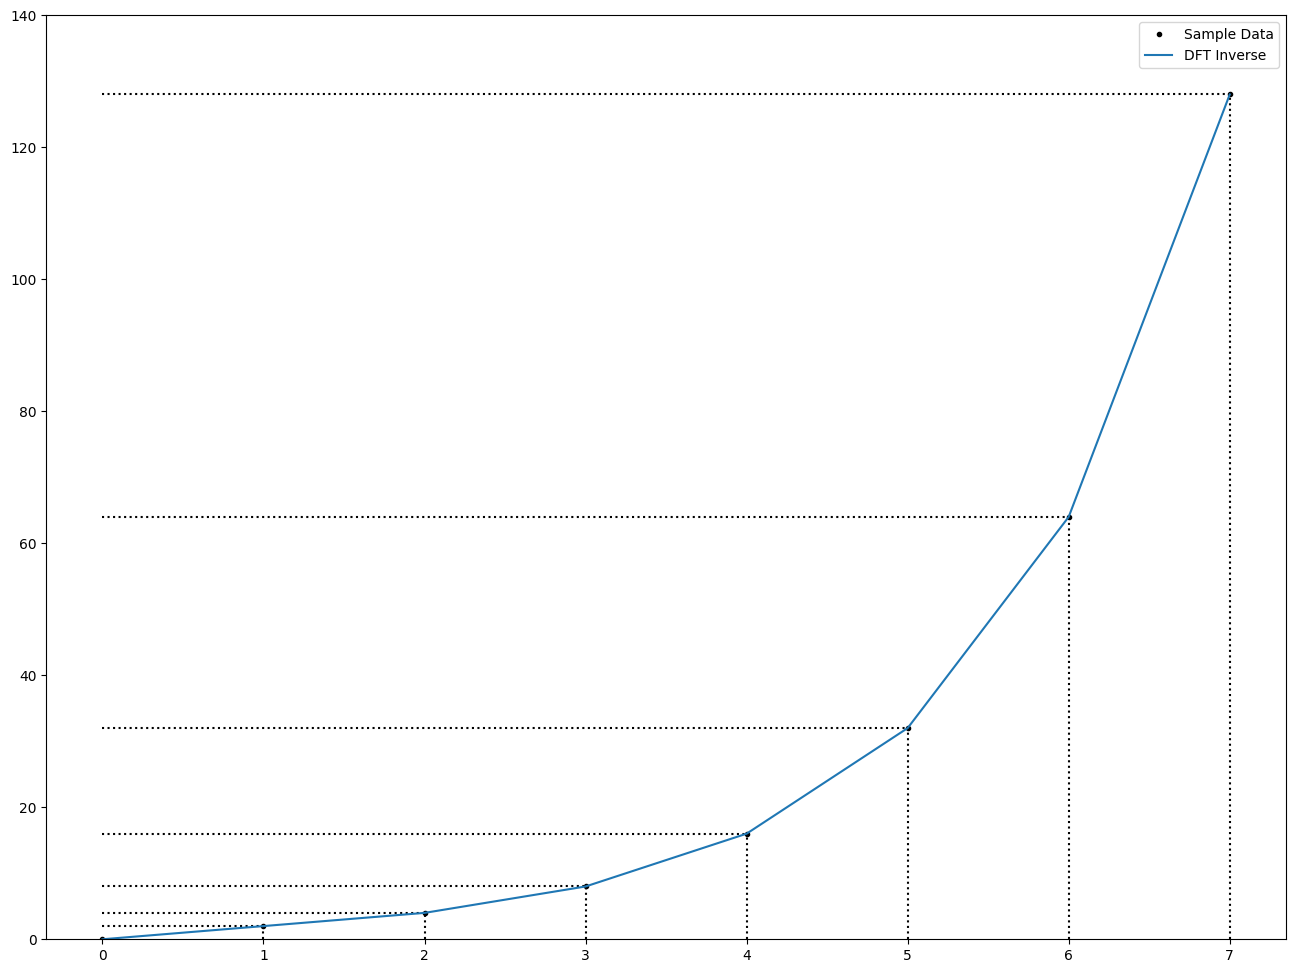

In [47]:
# Plotting Graph Inverse DFT vs Data Sample

plt.figure(figsize=(16, 12))
plt.ylim(0,140)

for i in range(len(x_discrete)):
    plt.vlines(x_discrete[i], ymin=0, ymax=y_discrete[i], linestyles="dotted", colors="black")
    plt.hlines(y_discrete[i], xmin=0, xmax=x_discrete[i], linestyles='dotted', color="black")

plt.plot(y_discrete, "k.", label="Sample Data")
plt.plot(np.real(dft_inv), label="DFT Inverse")
plt.legend()

plt.show()

Dari grafik di atas, didapatkan bahwa hasil inverse DFT yang di-plotting secara bersamaan dengan data sampel memiliki nilai yang sama. Hal ini menandakan bahwa proses transformasi DFT telah dilakukan dengan **benar**.

## Soal 2: Discrete-Time Systems and Difference Equations

Melakukan programming untuk mencari solusi real-time pada sistem berikut:

![Gambar Sistem](https://raw.githubusercontent.com/Evandita/RandomImages/refs/heads/main/matek.png)

dimana,
$$
{x_k} = {1}, y_0 = 0, y_1 = 0
$$
## Jawab:

### Mencari Persamaan

$$
y_{k+2} = x_k + \frac{1}{4}y_{k} - \frac{1}{5}y_{k+1}
$$

### Implementasi Program

<function matplotlib.pyplot.show(close=None, block=None)>

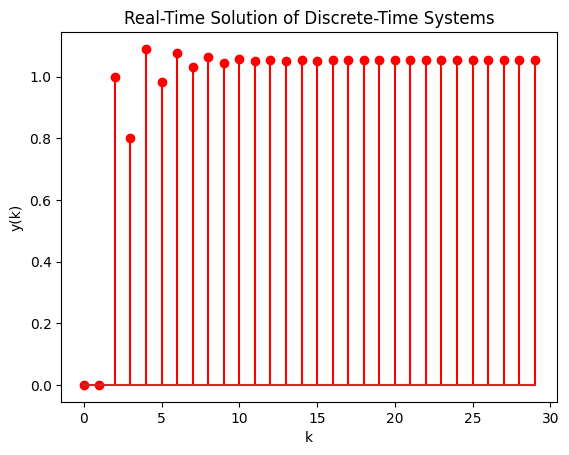

In [48]:
# Initial Conditions

k_total = 30 
y = np.zeros(k_total)
y[0] = 0
y[1] = 0
x = np.ones(k_total)

# Real-Time Solution

for k in range(k_total - 2):
    y[k+2] = x[k] + (1/4) * y[k] - (1/5) * y[k+1]

# Graph  Plotting

k_index = np.arange(k_total)
plt.stem(k_index, y, "r.")
plt.xlabel('k')
plt.ylabel('y(k)')
plt.title('Real-Time Solution of Discrete-Time Systems')
plt.show

### Referensi

1. "Advanced Engineering Mathematics 10th edition," Erwin Kreyszig

2. “Discrete fourier transform - simple step by step,” YouTube, https://youtu.be/mkGsMWi_j4Q (accessed Jun. 5, 2024). 

3. “Continuous Fourier transform,” YouTube, https://youtu.be/dWvrXBI1zwg?list=PLD932dho4NOrHYZCkvrjy7MmntFlrrTVH (accessed Jun. 5, 2024). 

4. “Discrete fourier transform,” YouTube, https://youtu.be/eZrbVlIQRTI?list=PLD932dho4NOrHYZCkvrjy7MmntFlrrTVH (accessed Jun. 5, 2024).  